# Year 2023 Day 24

[--- Day 24: Never Tell Me The Odds ---](https://adventofcode.com/2023/day/24)


## Introduction

This notebook:

- illustrates only the Part 1 of the problem
- illustrates and explains the Part 2 of the problem

This problem is generalizing the notion of the [kill two birds with one stone](https://en.wiktionary.org/wiki/kill_two_birds_with_one_stone) idiom (or, less bellicose, [faire d’une pierre deux coups](https://fr.wiktionary.org/wiki/faire_d%E2%80%99une_pierre_deux_coups) in French 🇫🇷, translating literally to _make with one stone two hits_).

In the problem, the stone is still a stone, but instead of 2 birds, we have many hailstones. The goal is to find from where and how fast should we throw a stone to strike all moving hailstones. Luckily, all moving objects follow an _uniform rectilinear motion_, meaning they moves along a straight path at constant speed, with no acceleration.

See [Hail](https://en.wikipedia.org/wiki/Hail) for the definition of the term _hailstone_

## Motive

The goal of this notebook is to provide an explanation of the thought process required to solve the problem. Indeed, I admit that I stole the solution from a Reddit post of another competitor. To restore the balance, I wanted to retro-engineer the solution and go back into mathematics that used to be simpler to me years ago, when I was a student... Hence, this notebook will provide plentiful of visualizations to accompany equations.

Visualization-wise, the [Observable's Plot Link Mark](https://observablehq.com/plot/marks/link) will be the king of this notebook, as many vectors will be materialized thanks to it. The API is well-suited for this kind of visualizations, and is very straight-forward to use. Using it fells like having an actual sheet of paper, rulers, and pen of multiple colors. The visualization building stacks marks on top of each other, with the same process as one would do with paper and pen only.

The problem-space is in 3D, but in all the following visualizations, the Z-axis will be omitted. Indeed, the problem remains in essence similar when going from 2D to 3D: 1D lines must intersect, whether they are in a 2D plane or a 3D space. Moreover, properties of vectors that are useful for visualization, such as collinearity remain the same when plotting in 2D. Using 2D simplifies the plot while not losing any informative value for this problem.

## Related Puzzles

See [Notebook 202311](./notebook_problem_202311.html) for an earlier experimentation of the Observable Plot visualization framework, with the Raster and Rule marks. Some code is shared between both of them, especially the Raster part to plot xarray DataArrays.

A similar visualization philosophy might be applied to the Problem 202322 (falling bricks): projecting the 3D space in 2D at first, and then visualizing the falling bricks in 3D?


In [1]:
import pandas as pd
import numpy as np

In [2]:
from advent_of_code.y_2023.problem_202324 import AdventOfCodeProblem202324, Hailstone


problem = AdventOfCodeProblem202324()
problem

AdventOfCodeProblem202324(year=2023, day=24)

## Part 1

In Part 1, the z-axis is ignored for the problem's solving.


### With Example Input


#### Convert Problem's Input to Visualization Input


In [3]:
from advent_of_code.common.common import get_example_inputs_file_contents


example_input = get_example_inputs_file_contents(2023)["test_problem_202324"][
    "EXAMPLE_INPUT"
]

In [4]:
example_hailstones = problem.parse_text_input(example_input)
example_hailstones

[Hailstone(position=array([19, 13, 30]), velocity=array([-2,  1, -2])),
 Hailstone(position=array([18, 19, 22]), velocity=array([-1, -1, -2])),
 Hailstone(position=array([20, 25, 34]), velocity=array([-2, -2, -4])),
 Hailstone(position=array([12, 31, 28]), velocity=array([-1, -2, -1])),
 Hailstone(position=array([20, 19, 15]), velocity=array([ 1, -5, -3]))]

The inputs are provided as a list of hailstones with their origin position coordinates and velocity.

The first step to visualize them as [_relative position vectors_](<https://en.wikipedia.org/wiki/Position_(geometry)#Relative_position>) is to convert this list of hailstones to a list of $(x_1, y_1, x_2, y_2)$ tuples, where $x_1, y_1$ is the starting position of the vector, and $x_2, y_2$ its ending position, where the arrow is. This format is required by the Observable Plot's Link Mark.

$x_1, y_1$ can be found from the origin position coordinates of the hailstone. $x_2, y_2$ must be computed for a given time. Because the hailstones follow a uniform rectilinear motion, the position coordinates of a vector can be computed with:

$$
\begin{aligned}
x(t) &= x(0) + v_x t
\newline
y(t) &= y(0) + v_y t
\end{aligned}
$$

In this visualization, all vectors start from their origin:

$$
\begin{aligned}
x(0) = x_1 &= hailstone.position.x
\newline
y(0) = y_1 &= hailstone.position.y
\end{aligned}
$$


In [5]:
def compute_vectors(hailstones: list[Hailstone], *, time_in_ns: int = 1):
    return pd.DataFrame(
        [
            (h.px, h.py, h.px + time_in_ns * h.vx, h.py + time_in_ns * h.vy, time_in_ns)
            for h in hailstones
        ],
        columns=["x1", "y1", "x2", "y2", "time_in_ns"],
    )


example_vectors = compute_vectors(example_hailstones, time_in_ns=1)
example_vectors

,x1,y1,x2,y2,time_in_ns
0,19,13,17,14,1
1,18,19,17,18,1
2,20,25,18,23,1
3,12,31,11,29,1
4,20,19,21,14,1


Now, we're ready to visualize the vectors.

#### Visualization


In [6]:
from advent_of_code.visualization.observable_plot import visualize_puzzle_input_202324

show_links = visualize_puzzle_input_202324

The first diagram shows the position vectors, relative to their initial position, as defined in the example input.
Their direction is indicated by the arrow symbol.

A small floating text indicates the time for which the position was computed; $t=1$ in this first plot.

The test area, defined by $x = [7, 27]$ and $y = [7, 27]$ is materialized by a white box.


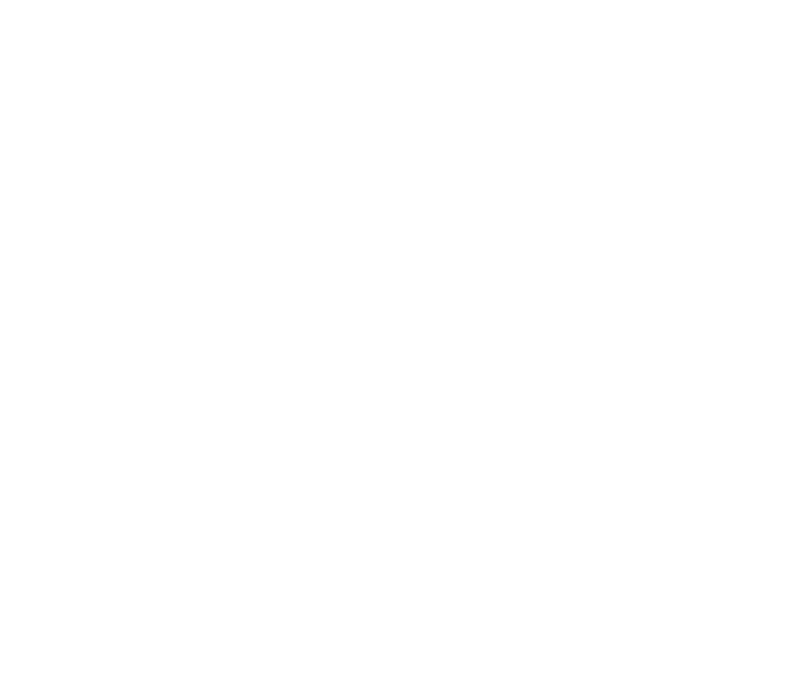

In [7]:
show_links(compute_vectors(example_hailstones, time_in_ns=1))

In the next plot, the successive **relative position vectors** are shown for $t=1, t=10, t=30$


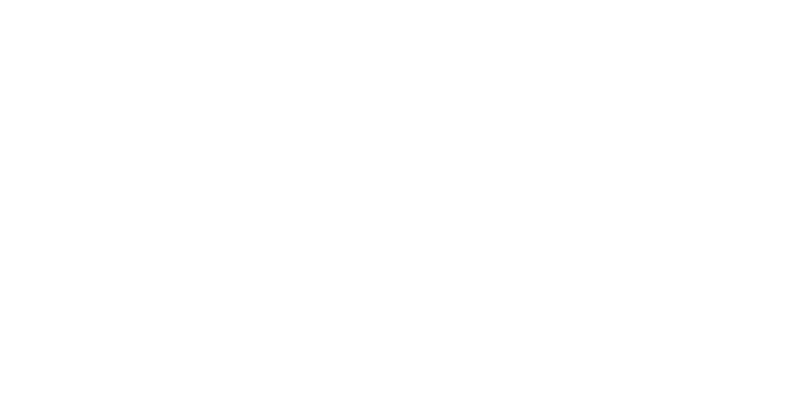

In [8]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [10, 1]]),
    strokeWidth=1,
)

We can visually assess that 2 hailstones' future paths cross inside the boundary of the test area, as mentioned in the problem input.


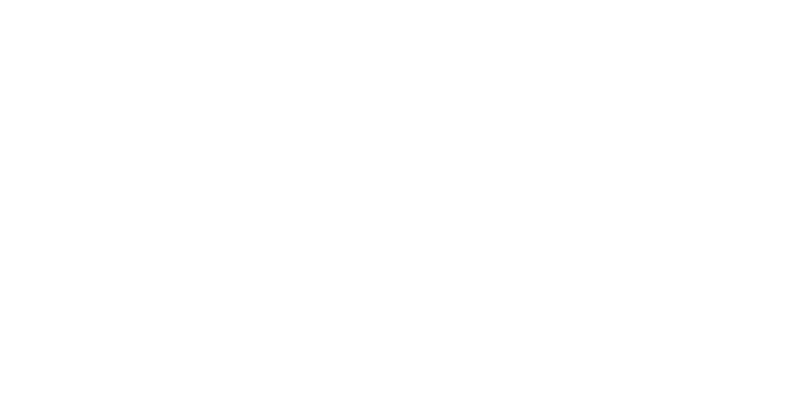

In [9]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [30, 10, 1]]),
    strokeWidth=1,
)

Finally, this plot is similar to the first one, but computed with `t=100` instead of `t=1`.


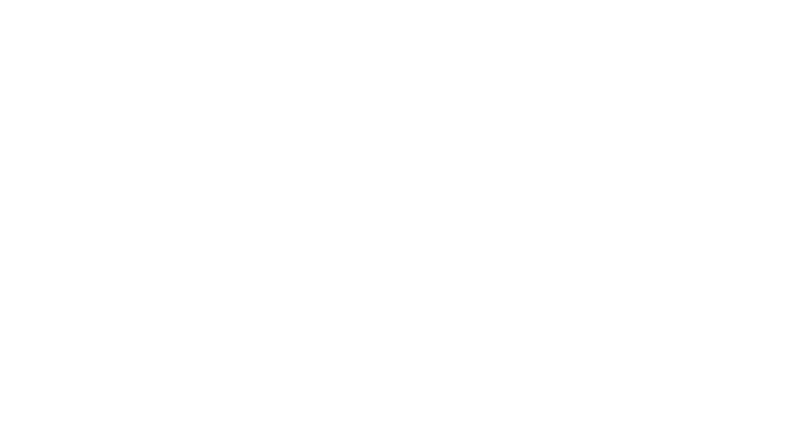

In [10]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [100]]),
    strokeWidth=1,
)

We can see that some hailstones' trajectories seem to never cross.


### With Actual Input

#### Visualization


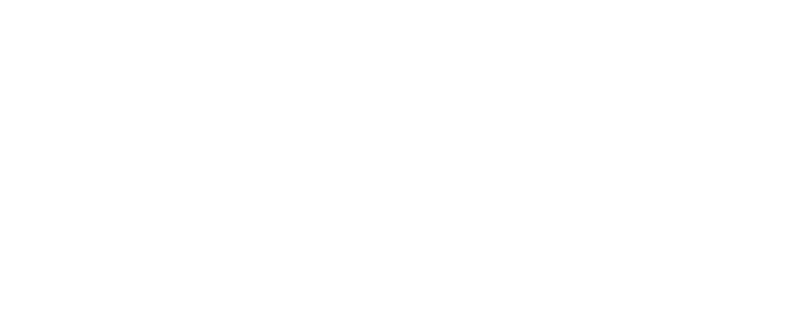

In [11]:
actual_hailstones = problem.parse_input_text_file()
base_time = 1e11
times = [base_time * 10, base_time * 5, base_time]

actual_hailstones_df = pd.concat(
    [compute_vectors(actual_hailstones, time_in_ns=t) for t in times],
)
domain = (200000000000000, 400000000000000)

show_links(
    actual_hailstones_df,
    strokeWidth=1,
    strokeOpacity=0.4,
    x_domain_test_area=domain,
    y_domain_test_area=domain,
    scheme="Set3",
    do_highlight_text=True,
)

## Part 2


### With Example Input


The problem description gives the initial position and velocity of a rock that would intersect with every hailstones.


In [12]:
rock = Hailstone(position=np.array([24, 13, 10]), velocity=np.array([-3, 1, 2]))

rock_df = compute_vectors([rock], time_in_ns=1)
rock_df

,x1,y1,x2,y2,time_in_ns
0,24,13,21,14,1


#### Visualization


Let's visualize this rock's trajectory:


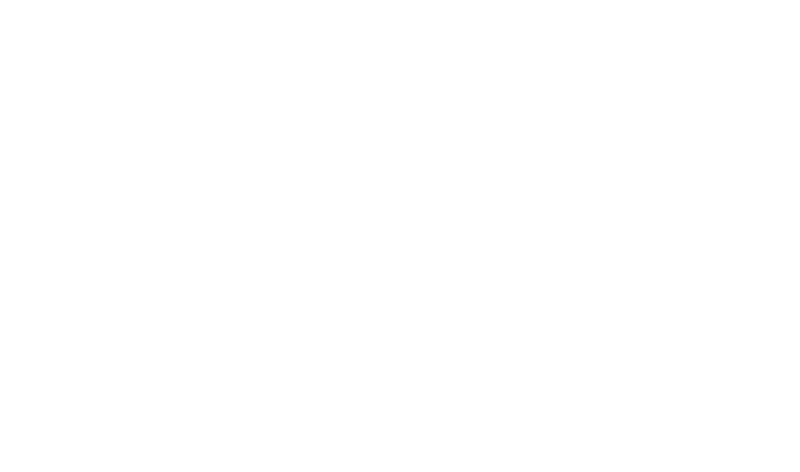

In [13]:
times = [10, 1]
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
    rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
    strokeWidth=1,
)

The rock's trajectory crosses all of the hailstones' trajectories, but do they actually collide like said in the problem input?

First, we can increase the time granularity, and show the successive plots for $t=1,2,3,4,5,6$.


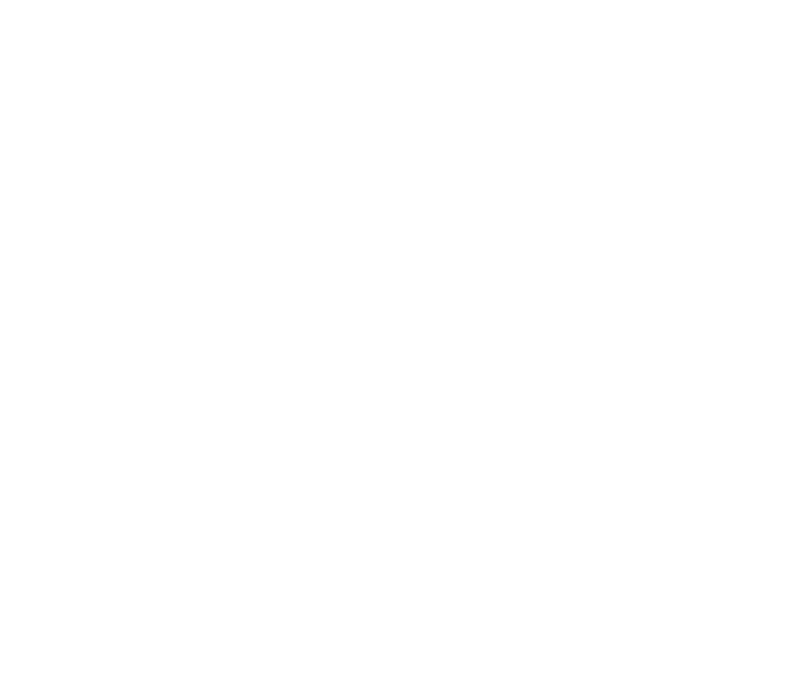

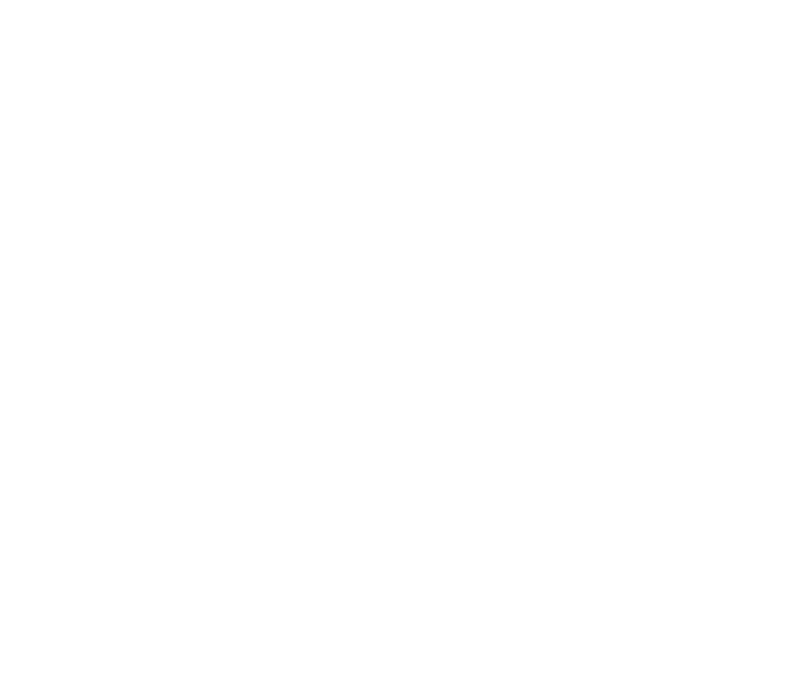

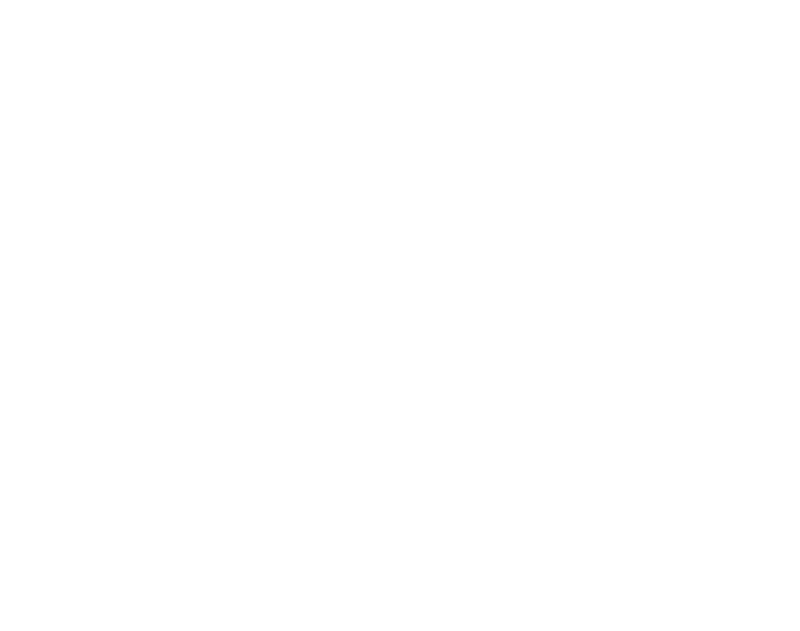

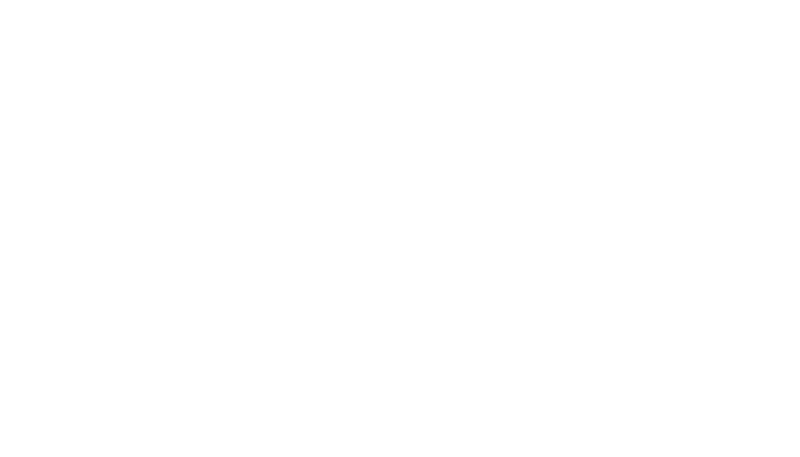

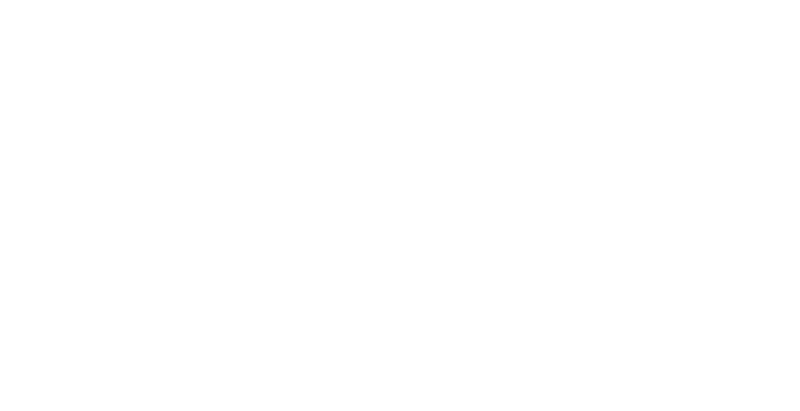

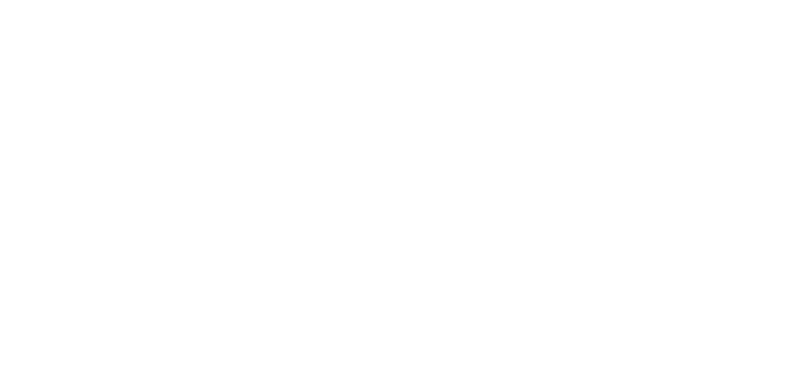

In [14]:
for i in range(1 + 1, 6 + 1 + 1):
    times = list(reversed(range(1, i)))
    show_links(
        pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
        rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
        strokeWidth=1,
    )

We can visually assess that the thrown rock intersects the 5 hailstones on integer times, at $t=1,3,4,5,6$.

Let's formalize this assumption.

#### Explanation

We introduce $p_i$ and $v_i$, 3D vectors, where $i$ is the hailstone identifier.

- $p_i$ is the position vector of the hailstone $i$.
- $v_i$ is the velocity vector of the hailstone $i$.

The position of the hailstone $i$ at any time $t$ is given, relative to its initial position $p_i(t=0)$, by:

$$\begin{equation}p_i = p_i(t) = p_i(t = 0) + t . v_i   \tag{1.1} \end{equation}$$

Note that the velocity is constant and do not depend on time (no acceleration).

The rock to be thrown follows a similar equation:

$$\begin{equation}r = p_r = p_r(t) = p_r(t = 0) + t . v_r   \tag{1.2} \end{equation}$$

$p_r(t = 0)$ and $v_r$ are unknown and must be determined to solve the problem.

During a collision, the position vector of the rock, $r(t)$, a 3D vector, is equal to the position vector of the hit hailstone. Let's denote $t_i$ the time of collision between the rock and the hailstone $i$. Note: $t_0 \ne 0$, $0$ is the hailstone identifier. We must have for all hailstones:

$$\begin{equation}r(t_i) = p_i(t_i)\end{equation}   \tag{2}$$

All **relative position vectors** (in red in the plots above) are collinear between each other, and collinear to the velocity vector of the rock to be thrown (an unknown). This means that for any $t_a$, $t_b$ and $t_c$ we have the following linear equation:

$$\begin{equation}r(t_b) - r(t_a) = \lambda (r(t_c) - r(t_a))   \tag{3} \end{equation}$$

where $\lambda$ is the scale factor / collinearity coefficient

We can add more of these equations by using the times of collision.

$$
\begin{equation}
\begin{aligned}
(r(t_2) - r(t_0)) &= \lambda_2 (r(t_1) - r(t_0))
\newline
(r(t_3) - r(t_0)) &= \lambda_3 (r(t_1) - r(t_0))
\newline
...
\newline
(r(t_n) - r(t_0)) &= \lambda_3 (r(t_1) - r(t_0))
\end{aligned}
\tag{4}
\end{equation}
$$

_In the following, only two of these equations are kept, as it is the minimal amount of equations needed to solve the problem. The reason why is detailed further down._

By substituting $r_i$ using $(2)$ we get:

$$
\begin{equation}
\begin{aligned}
(p_2(t_2) - p_0(t_0)) &= \lambda_2 (p_1(t_1) - p_0(t_0))
\newline
(p_3(t_3) - p_0(t_0)) &= \lambda_3 (p_1(t_1) - p_0(t_0))
\end{aligned}
\tag{5}
\end{equation}
$$

By substituting the $p_i$ using $(1)$ we get:

$$
\begin{equation}
\begin{aligned}
(p_2(t = 0) + t_2 . v_2 - p_0(t = 0) + t_0 . v_0) &= \lambda_2 (p_1(t = 0) + t_1 . v_1 - p_0(t = 0) + t_0 . v_0)
\newline
(p_3(t = 0) + t_3 . v_3 - p_0(t = 0) + t_0 . v_0) &= \lambda_3 (p_1(t = 0) + t_1 . v_1 - p_0(t = 0) + t_0 . v_0)
\end{aligned}
\tag{6}
\end{equation}
$$

The initial positions of each hailstone are known: $p_0(t = 0)$, $p_1(t = 0)$, $p_2(t = 0)$, $p_3(t = 0)$, as well as their constant velocity: $v_0$, $v_1$, $v_2$, $v_3$.

The unknowns are the times of collision between the rock and the hailstone $i$: $t_0$, $t_1$, $t_2$, $t_3$, as well as the scale factors, $\lambda_2$ and $\lambda_3$. This is a total of 6 unknown dispatched in 2 linear equations involving 3D vectors. By developing the 3D vectors into their $x, y, z$ components, we finally get a set of 6 equations with 6 unknowns:


$$
\begin{equation}
\begin{aligned}
(p_{2,x}(0) + t_2 . v_{2,x} - p_{0,x}(0) + t_0 . v_{0,x}) &= \lambda_2 (p_{1,x}(0) + t_1 . v_{1,x} - p_{0,x}(0) + t_0 . v_{0,x})
\newline
(p_{2,y}(0) + t_2 . v_{2,y} - p_{0,y}(0) + t_0 . v_{0,y}) &= \lambda_2 (p_{1,y}(0) + t_1 . v_{1,y} - p_{0,y}(0) + t_0 . v_{0,y})
\newline
(p_{2,z}(0) + t_2 . v_{2,z} - p_{0,z}(0) + t_0 . v_{0,z}) &= \lambda_2 (p_{1,z}(0) + t_1 . v_{1,z} - p_{0,z}(0) + t_0 . v_{0,z})
\newline
\newline
(p_{3,x}(0) + t_3 . v_{3,x} - p_{0,x}(0) + t_0 . v_{0,x}) &= \lambda_3 (p_{1,x}(0) + t_1 . v_{1,x} - p_{0,x}(0) + t_0 . v_{0,x})
\newline
(p_{3,y}(0) + t_3 . v_{3,y} - p_{0,y}(0) + t_0 . v_{0,y}) &= \lambda_3 (p_{1,y}(0) + t_1 . v_{1,y} - p_{0,y}(0) + t_0 . v_{0,y})
\newline
(p_{3,z}(0) + t_3 . v_{3,z} - p_{0,z}(0) + t_0 . v_{0,z}) &= \lambda_3 (p_{1,z}(0) + t_1 . v_{1,z} - p_{0,z}(0) + t_0 . v_{0,z})
\newline
\end{aligned}
\tag{7}
\end{equation}
$$

This system of equations can be fed to a symbolic mathematics equation solver, [SymPy](https://www.sympy.org/en/index.html). See [Solvers](https://docs.sympy.org/latest/modules/solvers/solvers.html) on SymPy's documentation.

Note regarding the amount of equations: with only one 3D equation instead of two, we would have had only 3 equations and 4 unknowns: $t_0$, $t_1$, $t_2$, as well as the scale factors, and $\lambda_3$. Hence, adding a second equation is necessary to get a solvable system.

Once solved, the following unknowns are now known: $t_0$, $t_1$, $t_2$, $t_3$, as well as the scale factors, $\lambda_2$ and $\lambda_3$. They can be used to find the initial position vector of the rock to be thrown, the data required to solve the problem.


For any $k \in \{1,2,3\}$, the position of the rock is a function of the time and can be found, because we have two positions and their respective times the rock must be at.

We need to alter a little bit the equation of $(1)$.

First, let's express the rock's velocity vector $v_r$ with the new known variables. Remainder: at collision time, $r(t_i) = p_i(t_i)$

$$v_r = \frac{r(t_k) + r(t_0)}{t_k-t_0} = \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}$$

We can then use a new way to express the rock's position: instead of using $t=0$ as a reference, we use $t_0$, the time of collision with the rock $0$.

$$
\begin{aligned}
\newline
r(t) &= r(t_0) + (t - t_0) . v_r
\newline
r(t) &= p_0(t_0) + (t - t_0) \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}
\end{aligned}
$$

The initial position can be found by applying this expression to $t = 0$.

$$
\begin{aligned}
r(t = 0) &= p_0(t_0) - t_0 \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}
\newline
r(t = 0) &=   \frac{(t_k - t_0) p_0(t_0) - t_0 p_k(t_k) + t_0 p_0(t_0)}{t_k-t_0}
\newline
r(t = 0) &=   \frac{t_k p_0(t_0) - t_0 p_0(t_0)  - t_0 p_k(t_k) + t_0 p_0(t_0)}{t_k-t_0}
\newline
r(t = 0) &=   \frac{t_k p_0(t_0)   - t_0 p_k(t_k) }{t_k-t_0}
\end{aligned}
$$


#### Problem Solving


In [15]:
from advent_of_code.y_2023.problem_202324 import solve_equation_system


p = [[h.px, h.py, h.pz] for h in example_hailstones[:4]]
v = [[h.vx, h.vy, h.vz] for h in example_hailstones[:4]]

s = solve_equation_system(p, v)
t0, t1, t2, t3, l2, l3 = s
print(f"{t0=}, {t1=}, {t2=}, {t3=}, {l2=}, {l3=}")

t0=5, t1=3, t2=4, t3=6, l2=1/2, l3=-1/2


The initial rock position computed with the solutions from the system of equations is identical to what the problem description is:


In [16]:
from advent_of_code.y_2023.problem_202324 import compute_rock_coords


k = 1
computed_rock = compute_rock_coords(s, k, p, v)
computed_rock

[24, 13, 10]

The computed rock is identical to what the problem's description provides.


In [17]:
computed_rock == [rock.px, rock.py, rock.pz]

True

Collision of the rock with hailstone at time=3


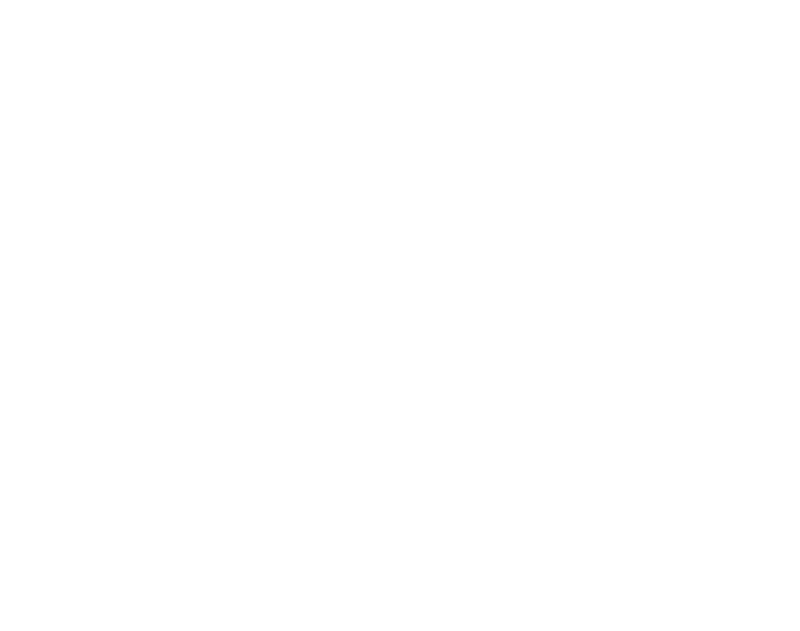

Collision of the rock with hailstone at time=4


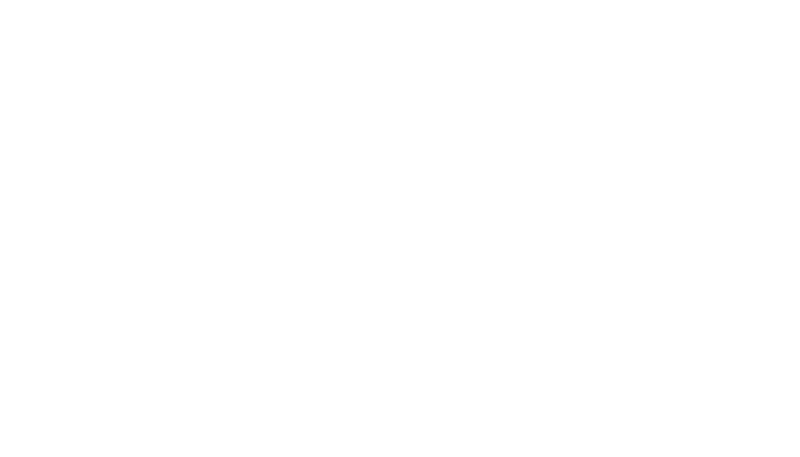

Collision of the rock with hailstone at time=5


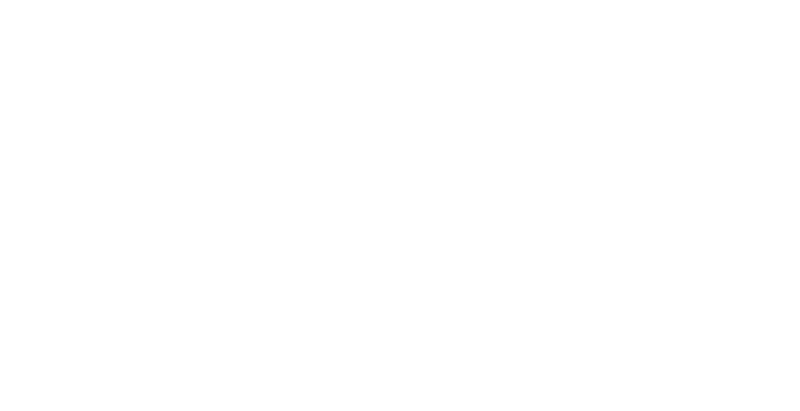

Collision of the rock with hailstone at time=6


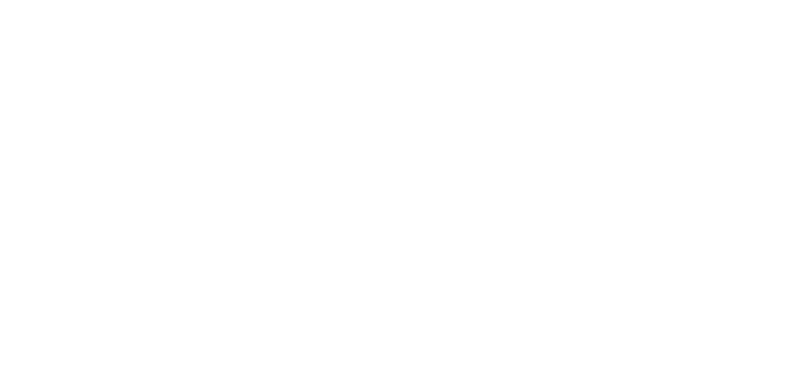

In [18]:
for time in sorted((t0, t1, t2, t3)):
    print(f"Collision of the rock with hailstone at {time=}")
    times = list(reversed(range(1, time + 1)))
    show_links(
        pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
        rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
        strokeWidth=1,
    )

### With Actual Input

#### Visualization


The visualization is done in 2D, as collinear 3D vectors also are in a 2D plane.

The plot from Part 1 is reused, with the rock trajectory added in red.


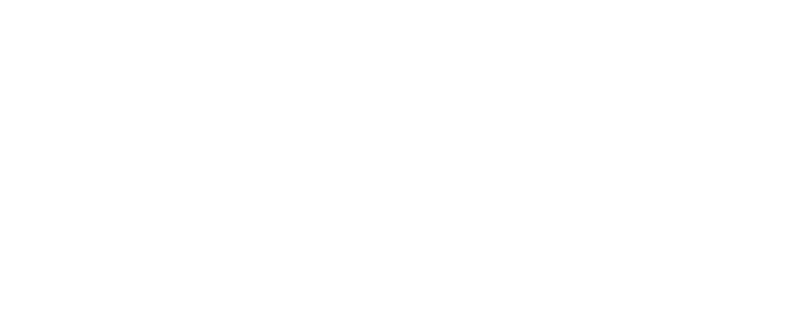

In [19]:
def compute_hailstone_position(h: Hailstone, time_in_ns: int) -> np.array:
    return np.array(
        (
            (h.px) + time_in_ns * (h.vx),
            (h.py) + time_in_ns * (h.vy),
            (h.pz) + time_in_ns * (h.vz),
        )
    )


def visualize_actual_input_results(actual_hailstones: list[Hailstone]):
    p = [[h.px, h.py, h.pz] for h in actual_hailstones[:4]]
    v = [[h.vx, h.vy, h.vz] for h in actual_hailstones[:4]]

    s = solve_equation_system(p, v)
    t0, t1 = s[:2]

    k = 1
    rock_position = np.array(compute_rock_coords(s, k, p, v), dtype=np.int64)
    rock_velocity = np.array(
        (
            compute_hailstone_position(actual_hailstones[1], t1)
            - compute_hailstone_position(actual_hailstones[0], t0)
        )
        / (t1 - t0),
        dtype=np.int64,
    )
    rock = Hailstone(position=rock_position, velocity=rock_velocity)

    base_time = 1e11
    times = [base_time * 10, base_time * 5, base_time]

    hailstones_df = pd.concat(
        [compute_vectors(actual_hailstones, time_in_ns=t) for t in times]
    )

    rock_df = pd.concat([compute_vectors([rock], time_in_ns=t) for t in times])

    domain = (200000000000000, 400000000000000)
    show_links(
        hailstones_df,
        rock_df=rock_df,
        strokeWidth=1,
        strokeOpacity=0.4,
        x_domain_test_area=domain,
        y_domain_test_area=domain,
        scheme="Set3",
        rock_strokeWidth=3,
        rock_strokeDasharray="",
        do_highlight_text=True,
    )


visualize_actual_input_results(actual_hailstones)

## Observations

First, the input data is excessively large as only the first 4 hailstones were required to solve the problem. Indeed, the collinearity constraint is strong, leaving few degrees of freedom. The remaining hundreds of hailstones follow the same rules.


In [20]:
print(
    f"Percentage of used hailstones in the personalized input data : {4 / len(actual_hailstones):.2%}"
)

Percentage of used hailstones in the personalized input data : 1.33%


## Improvement Ideas

- **Go from static to dynamic**: animate the rock colliding the hailstones, where frames are a function of time. It could be interesting to add an animation showing the absolute position vectors "collapse" with time passing, becoming collinear at a singular time. Also, watching the various hailstones hitting the thrown rock's trajectory;
- **Go from 2D to 3D**: use a visualization library such as [pythreejs](https://pythreejs.readthedocs.io/en/stable/) to visualize the problem's space;
- **Go from non-interactive to interactive**: this one is harder in a notebook context, but the idea would be to be able to move the space with the mouse. It may be enabled by `pythreejs`.

## Known Limitations

About `pythreejs` integration: the notebook must be left empty and then computed during the sphinx build process for the widgets to be shown. If the notebook is pre-ran manually, no widgets will be shown.

See [Geometries (HTML)](https://pythreejs.readthedocs.io/en/stable/examples/Geometries.html) for `pythreejs` examples
and [Geometries (source ipynb)](https://github.com/jupyter-widgets/pythreejs/blob/ebf601e805547e3ae6f656d3fe4ff89aa5ab2dac/examples/Geometries.ipynb)
for example of successful notebook pre-rendering with pythreejs widgets

So, the integration of notebook generation in the build process (GitHub action) must be achieved for using `pythreejs`, at least for some libs that does not require system dependencies (unlike graphviz for instance). Hopefully, JS-leaning notebooks using pythreejs and pyobservable plot should be easier to build.
